# VARIABLES THAT WILL INFULENCE THE RESIDENSIAL HOME PRICE IN THE UNITED STATES

### 1. Neighborhood comps
### 2. Location (Geographical factors)
### 3. Home size and usable space
### 4. Age and condition
### 5. Upgrades and updates
### 6. The local market
### 7. Economic indicators
### 8. Interest rates
### 9. Consumer confidence
### 10.Mortgage availability
### 11. Supply 

# NOTE
### Since I was Unable to get the dataset with the same names so I used the CALIFORNIA_HOUSING dataset for my project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time 
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('/home/onionfrost/Desktop/house pricing california/california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


/home/onionfrost/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


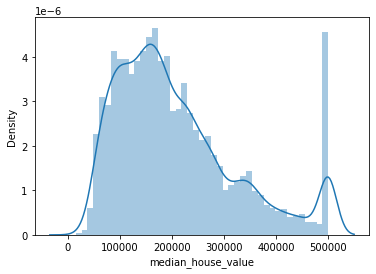

In [7]:
sns.distplot(df['median_house_value'])
plt.show()

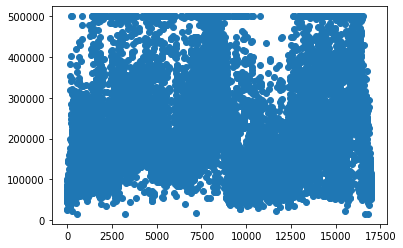

In [8]:
plt.scatter(df.index, df['median_house_value'])

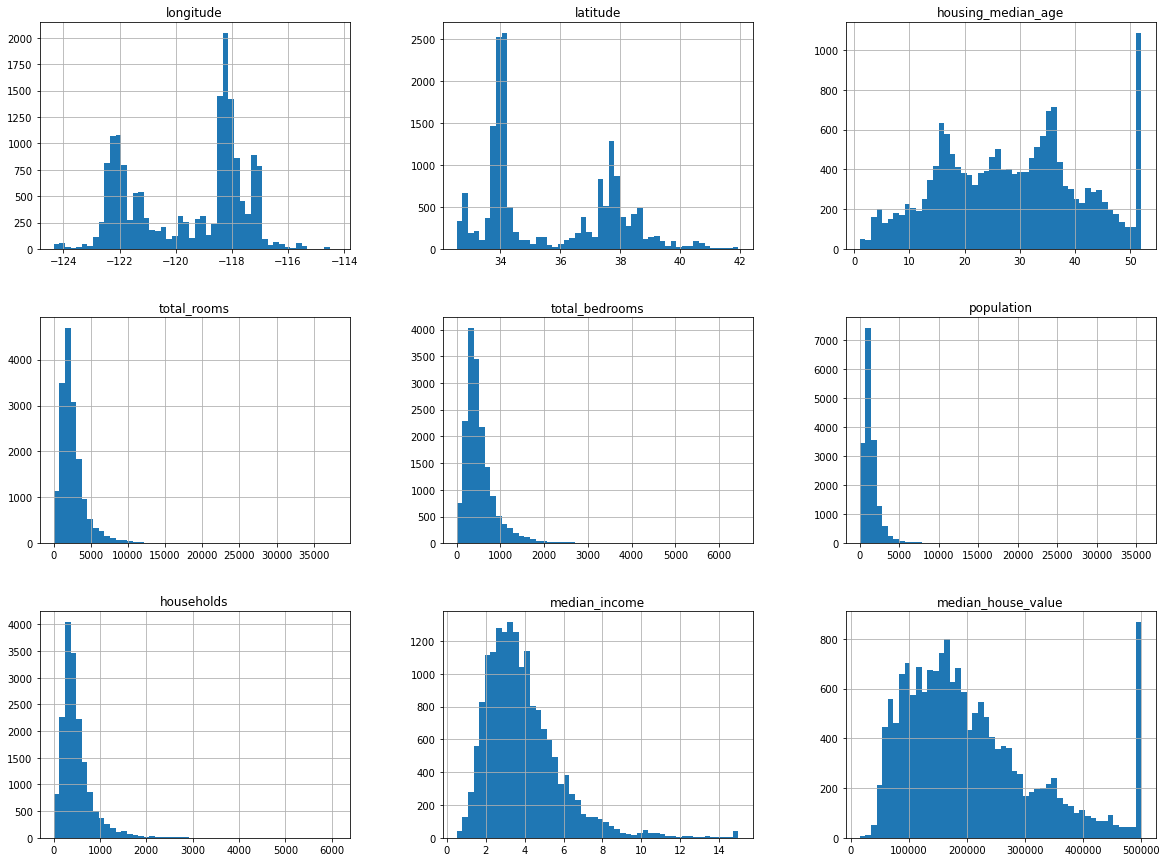

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

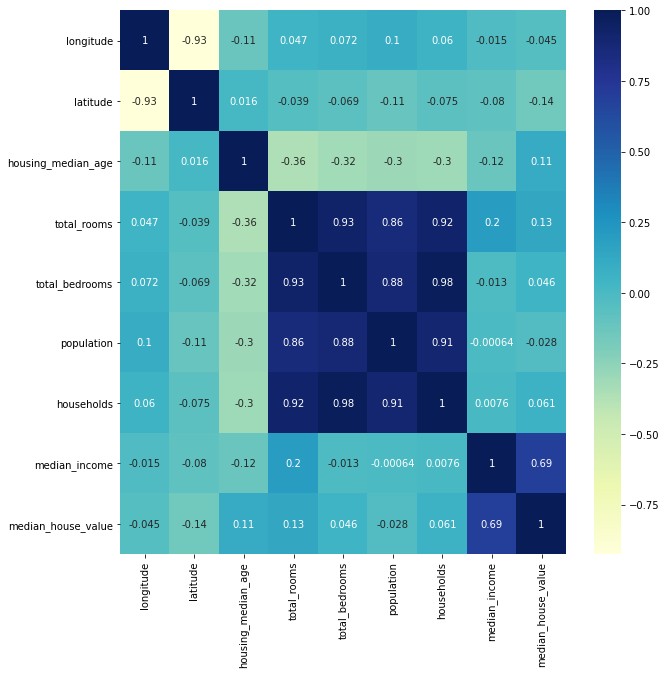

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , cmap="YlGnBu", annot=True)
plt.show()

# Applying Linear Regression

In [11]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [13]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([-4.28227975e+04, -4.25694322e+04,  1.19488501e+03, -8.61182985e+00,
        1.17050505e+02, -3.54496316e+01,  4.21943550e+01,  4.07532650e+04])

In [16]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
longitude,-42822.797475
latitude,-42569.432175
housing_median_age,1194.885010
total_rooms,-8.611830
total_bedrooms,117.050505
population,-35.449632
households,42.194355
median_income,40753.265034


In [17]:
lr.intercept_

-3599318.296760632

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred=lr.predict(X_test)
pred

array([210398.86432521, 218489.79875463, 466837.42862007, ...,
       165451.81183772, 210976.15914391, 260640.60388325])

MAE: 50808.94747845923
MSE: 4802176230.0180235
RMSE: 69297.73611033786


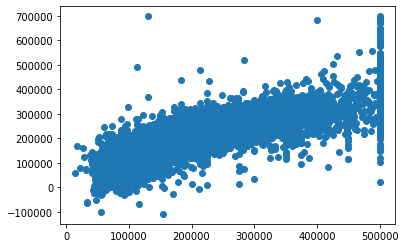

In [19]:
plt.scatter(y_test,pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [20]:
r2_score_lr = r2_score(y_test, pred)
r2_score_lr

0.6372922605975015

# Finding the Best Parameter Using GridSearchCV

### RIDGE REGRESSION

In [21]:
%%time
# Specify the list of alpha hyperparameters.
alphas = 10**np.linspace(10,-2,100)*0.5
params = {'alpha': alphas}

# Ridge Regression
ridge = Ridge()

# Set up GridSearchCV() function with the range of hyperparameters.
# Create a KFold object with 10 splits.
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 15.5 s, sys: 51.3 s, total: 1min 6s
Wall time: 5.68 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [22]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
62,0.002473,0.000057,0.001298,0.000048,152.693,{'alpha': 152.69277544167062},-50033.355916,-51305.810388,-49612.718949,-50062.627677,...,-50958.625019,-50956.243680,-50815.151314,-50804.126998,-50647.071634,-50825.728118,-50771.137271,-50882.019328,-50844.084924,115.779535
63,0.002463,0.000041,0.001287,0.000017,115.506,{'alpha': 115.5064850041579},-50034.643087,-51284.742412,-49606.321425,-50080.301349,...,-50958.857703,-50955.635091,-50815.834353,-50802.876430,-50646.049072,-50825.211463,-50772.808323,-50881.656568,-50843.884778,115.897504
64,0.002484,0.000069,0.001291,0.000017,87.3764,{'alpha': 87.37642000038414},-50038.199033,-51268.852006,-49603.002277,-50095.262546,...,-50960.866905,-50957.115027,-50817.961919,-50803.534867,-50647.349267,-50826.850448,-50776.023774,-50883.173318,-50845.585403,115.992219
65,0.002479,0.000035,0.001295,0.000033,66.0971,{'alpha': 66.09705742330144},-50041.349285,-51257.197571,-49600.712388,-50107.453571,...,-50963.425125,-50959.244516,-50820.236632,-50804.950826,-50649.377330,-50829.165443,-50779.381228,-50885.181676,-50847.854397,116.051317
66,0.002456,0.000029,0.001296,0.000031,50,{'alpha': 50.0},-50044.009019,-51249.683924,-49599.921213,-50117.316287,...,-50965.852548,-50961.391220,-50822.584652,-50806.585097,-50651.362552,-50831.468299,-50782.619507,-50887.224281,-50850.134085,116.071868
67,0.002518,0.000108,0.001304,0.000077,37.8232,{'alpha': 37.823166377731454},-50046.465489,-51244.143026,-49599.535918,-50124.878040,...,-50968.076598,-50963.320884,-50824.759825,-50808.107084,-50653.153213,-50833.587156,-50785.519647,-50889.023286,-50852.194861,116.070874
68,0.002516,0.000062,0.001312,0.000045,28.6118,{'alpha': 28.611838296751102},-50048.715188,-51240.351595,-49599.258844,-50130.656964,...,-50970.044915,-50964.985098,-50826.686717,-50809.390908,-50654.714636,-50835.337256,-50787.918287,-50890.508972,-50853.945436,116.070378
69,0.002480,0.000039,0.001334,0.000060,21.6438,{'alpha': 21.643806405415308},-50050.464454,-51237.683288,-49599.318953,-50135.062539,...,-50971.683447,-50966.366690,-50828.253067,-50810.498745,-50655.925623,-50836.735570,-50789.786894,-50891.741645,-50855.362716,116.081317
70,0.002485,0.000051,0.001301,0.000040,16.3727,{'alpha': 16.372745814388658},-50051.829916,-51235.655809,-49599.584928,-50138.414854,...,-50972.974801,-50967.444856,-50829.505240,-50811.380163,-50656.893314,-50837.861264,-50791.218407,-50892.736602,-50856.486003,116.091362
71,0.002492,0.000048,0.001301,0.000053,12.3854,{'alpha': 12.38538177995857},-50052.870149,-51234.127327,-49599.790244,-50140.962088,...,-50974.008952,-50968.292081,-50830.490591,-50812.084475,-50657.653610,-50838.763256,-50792.350386,-50893.530086,-50857.375144,116.105726


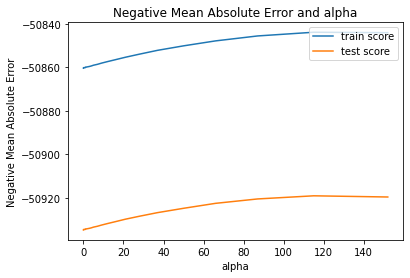

In [23]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [24]:
alpha = 150
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.05736587e+04, -4.04743976e+04,  1.22990207e+03, -8.81483196e+00,
        1.14230980e+02, -3.55216319e+01,  4.69772298e+01,  4.08796088e+04])

In [25]:
%%time
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(ridge)
print("r^2 on test data : %f" % r2_score_ridge)

Ridge(alpha=150)
r^2 on test data : 0.637024
CPU times: user 11.5 ms, sys: 7.92 ms, total: 19.4 ms
Wall time: 6.21 ms


Text(0, 0.5, 'Predicted Y')

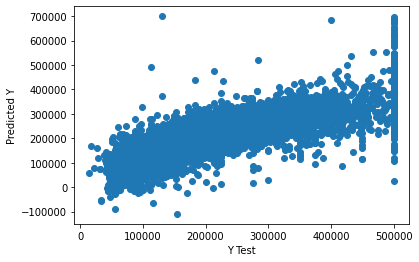

In [26]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### LASSO REGRESSION

In [27]:
%%time
# Specify the list of alpha hyperparameters.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

# Hide warnings if needed.
import warnings
warnings.filterwarnings('ignore')

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1min 1s, sys: 3min 2s, total: 4min 3s
Wall time: 21.2 s


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   21.1s finished


In [28]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.083376,0.015359,0.001393,0.000140,0.0001,{'alpha': 0.0001},-50056.141838,-51229.696649,-49600.450827,-50148.937026,...,-50977.366950,-50971.106618,-50833.730747,-50814.515922,-50660.309328,-50841.852921,-50796.187652,-50896.313364,-50860.365307,116.131296
1,0.097528,0.017006,0.001352,0.000195,0.001,{'alpha': 0.001},-50056.141785,-51229.696710,-49600.450820,-50148.936899,...,-50977.366897,-50971.106573,-50833.730696,-50814.515881,-50660.309282,-50841.852869,-50796.187592,-50896.313317,-50860.365258,116.131296
2,0.097011,0.028043,0.001481,0.000354,0.01,{'alpha': 0.01},-50056.141264,-51229.697327,-49600.450742,-50148.935631,...,-50977.366365,-50971.106128,-50833.730183,-50814.515466,-50660.308828,-50841.852354,-50796.186990,-50896.312850,-50860.364769,116.131298
3,0.089142,0.027807,0.001759,0.000999,0.05,{'alpha': 0.05},-50056.138948,-51229.700068,-49600.450398,-50148.929992,...,-50977.364002,-50971.104147,-50833.727905,-50814.513626,-50660.306811,-50841.850064,-50796.184318,-50896.310774,-50860.362598,116.131304
4,0.058085,0.016472,0.001478,0.000082,0.1,{'alpha': 0.1},-50056.136054,-51229.703495,-49600.449968,-50148.922944,...,-50977.361047,-50971.101671,-50833.725057,-50814.511325,-50660.304290,-50841.847202,-50796.180978,-50896.308179,-50860.359884,116.131312
5,0.082786,0.017977,0.001631,0.000263,0.2,{'alpha': 0.2},-50056.130264,-51229.710348,-49600.449109,-50148.908847,...,-50977.355137,-50971.096719,-50833.719361,-50814.506723,-50660.299246,-50841.841477,-50796.174297,-50896.302989,-50860.354456,116.131328
6,0.061468,0.023868,0.001567,0.000338,0.3,{'alpha': 0.3},-50056.124474,-51229.717202,-49600.448249,-50148.894750,...,-50977.349228,-50971.091767,-50833.713665,-50814.502121,-50660.294203,-50841.835753,-50796.167616,-50896.297799,-50860.349028,116.131343
7,0.077916,0.017746,0.001611,0.000292,0.4,{'alpha': 0.4},-50056.118684,-51229.724055,-49600.447390,-50148.880653,...,-50977.343319,-50971.086815,-50833.707969,-50814.497519,-50660.289160,-50841.830028,-50796.160935,-50896.292609,-50860.343601,116.131359
8,0.077931,0.020394,0.001911,0.000733,0.5,{'alpha': 0.5},-50056.112894,-51229.730908,-49600.446530,-50148.866557,...,-50977.337409,-50971.081864,-50833.702272,-50814.492917,-50660.284117,-50841.824304,-50796.154254,-50896.287419,-50860.338173,116.131375
9,0.072457,0.004001,0.001636,0.000382,0.6,{'alpha': 0.6},-50056.107105,-51229.737761,-49600.445670,-50148.852460,...,-50977.331500,-50971.076912,-50833.696576,-50814.488315,-50660.279074,-50841.818579,-50796.147573,-50896.282228,-50860.332745,116.131391


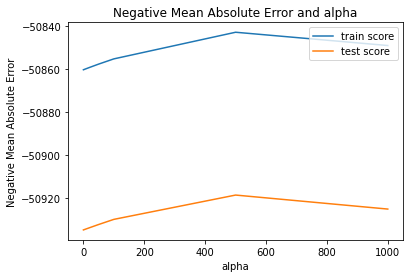

In [29]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# # Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [30]:
alpha =500
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([-4.09535189e+04, -4.08270687e+04,  1.22044901e+03, -8.78314505e+00,
        1.14653745e+02, -3.55050957e+01,  4.61899046e+01,  4.08558513e+04])

In [31]:
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=500)
r^2 on test data : 0.637100


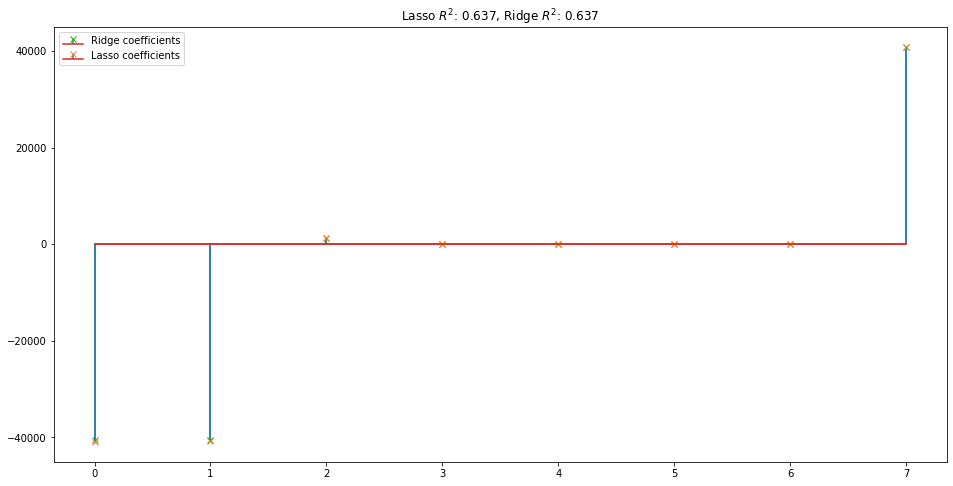

In [32]:
plt.figure(figsize=(16,8))
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Ridge $R^2$: %.3f"
          % (r2_score_lasso, r2_score_ridge))
plt.show()

Text(0, 0.5, 'Predicted Y')

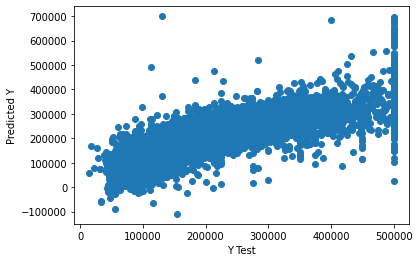

In [33]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')